**Mounting the google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Important libraries**

In [ ]:
# linear algebra
import numpy as np
import math

# data processing
import pandas as pd
from sklearn.preprocessing import StandardScaler

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix


**Step 1: Uploading Dataset**

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CodSoft/Task 1: TITANIC/tested.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Step 2: Exploratory data analysis**

1. Shape: Dimensions( rows and columns) of a DataFrame.

In [ ]:
df.shape

(418, 12)

2. Describe: Provides a summary statistics of a DataFrame

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


3. Info: Provides concise information about a DataFrame, including the data types, non-null counts, and memory usage.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


4. Checking missing values

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Analysis: Column Age, Fare and Cabin contain missing values.

<Axes: >

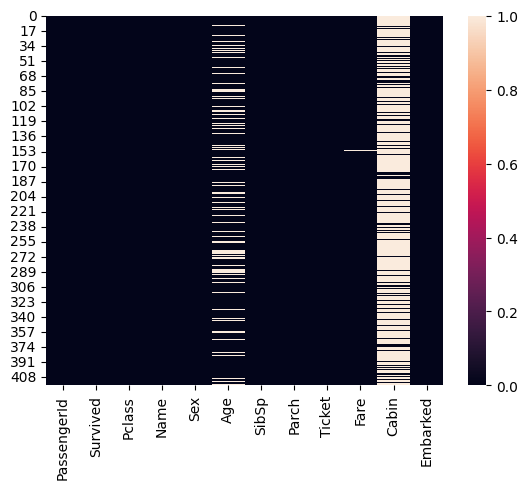

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df[df["Age"]<=0].shape

(0, 12)

5. Addressing missing values: Imputing the Age column by substituting missing values with the median age, filling in the missing Fare values with the mean fare and dropping the column Cabin because it is not so important.

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [ ]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [ ]:
df.drop(['Cabin'], axis=1, inplace=True)


In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27,0,0,A.5. 3236,8,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7,S
416,1308,0,3,"Ware, Mr. Frederick",male,27,0,0,359309,8,S


<Axes: >

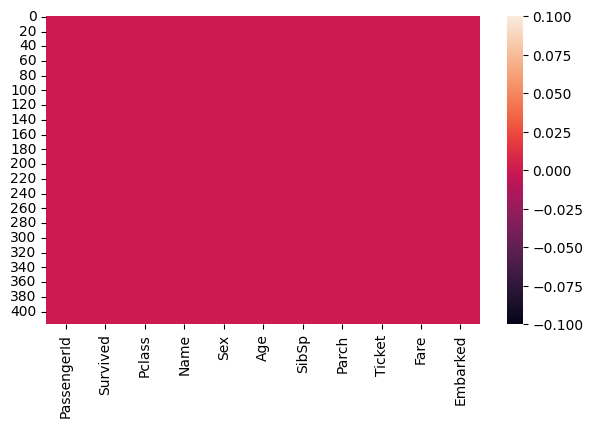

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(df.isnull())

Analysis: Successfully handled missing values. Now dataset contain 0 missing vales.

6. dtypes: Checking datatypes of dataframes

In [ ]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Embarked       object
dtype: object

In [ ]:
numerical_data = []
object_data = []

for column in df.columns:
    if df.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

In [ ]:
numerical_data

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Analysis: The columns "Name," "Sex," "Ticket," and "Embarked" have data type "object".

In [ ]:
Embarkeds = df.Embarked.unique()
for Embarked in Embarkeds:
    print("Embarked:", Embarked)

Embarked: Q
Embarked: S
Embarked: C


7. Handling with different datatypes by converting the object into numeric values.

In [ ]:
df['Embarked'] = df["Embarked"].map({'Q':0, 'S':1, 'C':2}).astype(int)
df["Embarked"].head(5)

0    0
1    1
2    0
3    1
4    1
Name: Embarked, dtype: int64

In [ ]:
df["Sex"] = df["Sex"].map({'female':1, 'male':0}).astype(int)
df["Sex"].head(5)

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64

In [ ]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex             int64
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Embarked        int64
dtype: object

7. Feature selection: Removing the unnecessary Columns.

In [ ]:
useless_col = df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace = True)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


In [ ]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Fare        int64
Embarked    int64
dtype: object

Analysis: Converted object datatypes into int64 and removed unnecessary columns.

**Step 3: Data Visualization**

[]

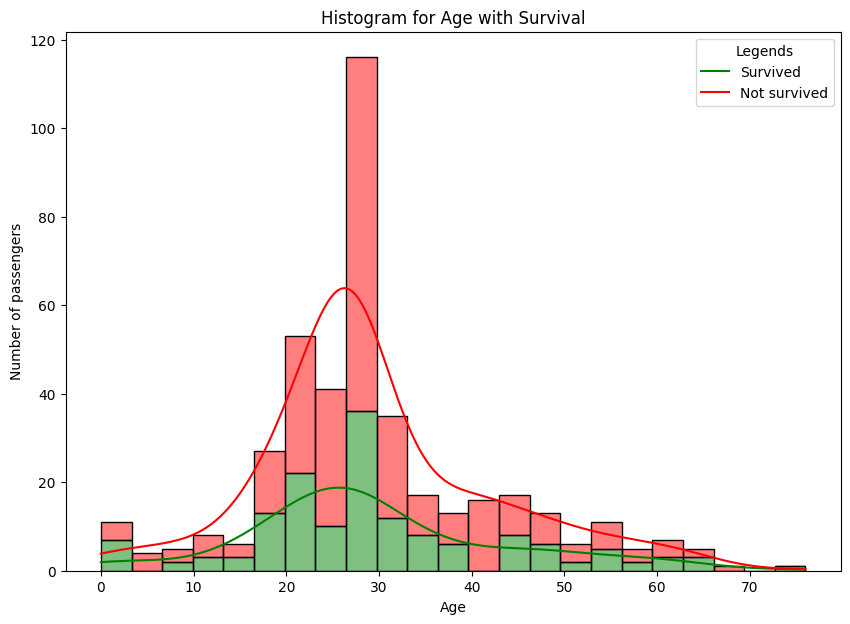

In [ ]:
_, ax = plt.subplots(figsize = (10, 7))
sns.histplot(data = df, x = "Age", hue = "Survived", multiple = "stack", kde = True, palette=["red", "green"], ax = ax)
ax.set_title("Histogram for Age with Survival")
ax.set_xlabel("Age")
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Survived", "Not survived"])
plt.plot()

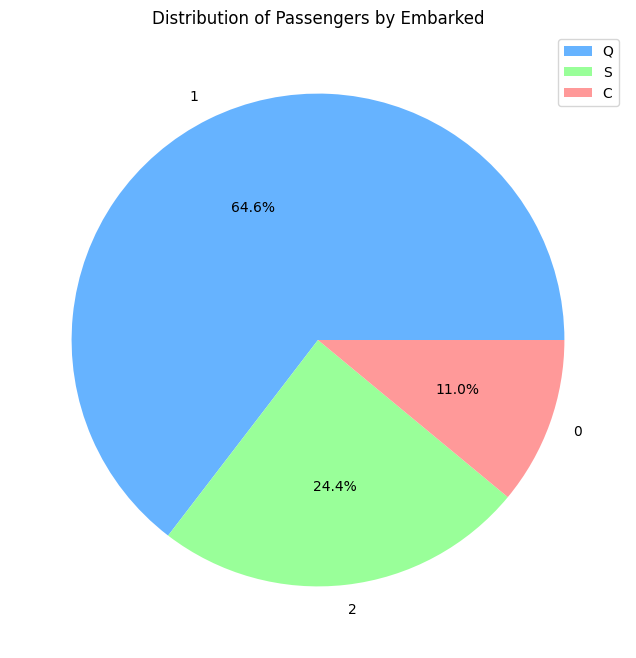

In [ ]:
embarked_counts = df['Embarked'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff9999'])
plt.title("Distribution of Passengers by Embarked")
plt.legend(["Q", "S", "C"])
plt.show()

[]

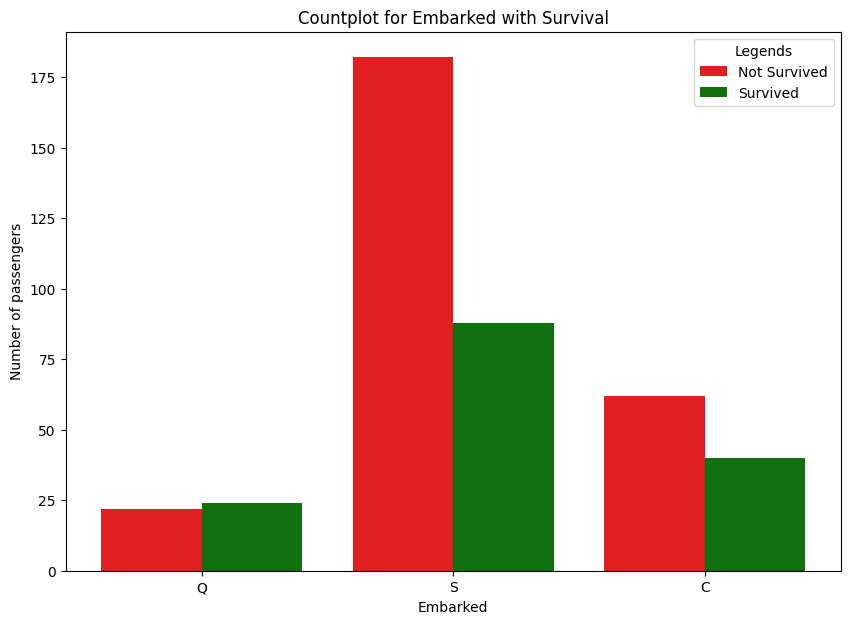

In [ ]:
_, ax = plt.subplots(figsize = (10, 7))
sns.countplot(data = df, x = "Embarked", hue = "Survived", palette=["red", "green"], ax = ax)
ax.set_title("Countplot for Embarked with Survival")
ax.set_xlabel("Embarked")
ax.set_xticklabels(["Q", "S", "C"])
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
plt.plot()

[]

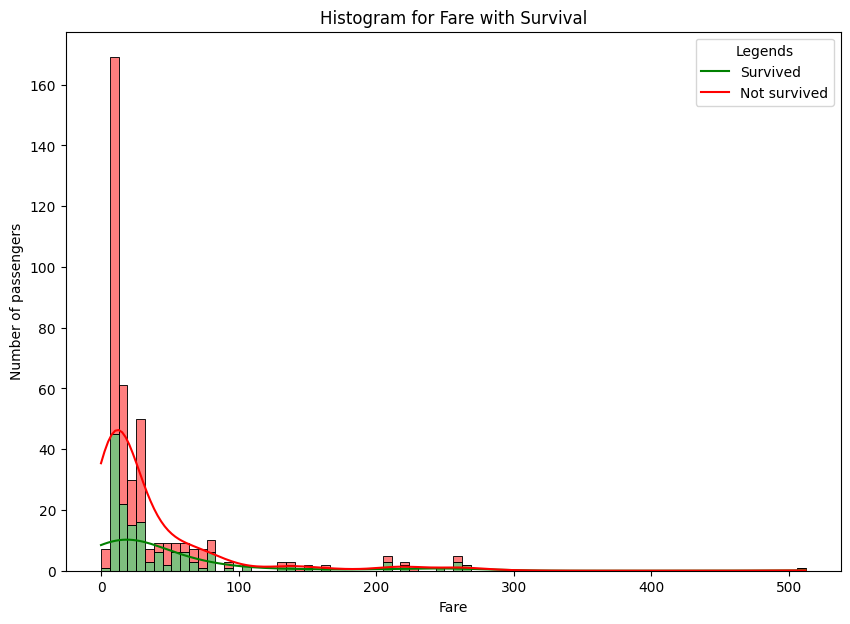

In [ ]:
_, ax = plt.subplots(figsize = (10, 7))
sns.histplot(data = df, x = "Fare", hue = "Survived", multiple = "stack", kde = True, palette = ["red", "green"], ax = ax)
ax.set_title("Histogram for Fare with Survival")
ax.set_xlabel("Fare")
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Survived", "Not survived"])
plt.plot()

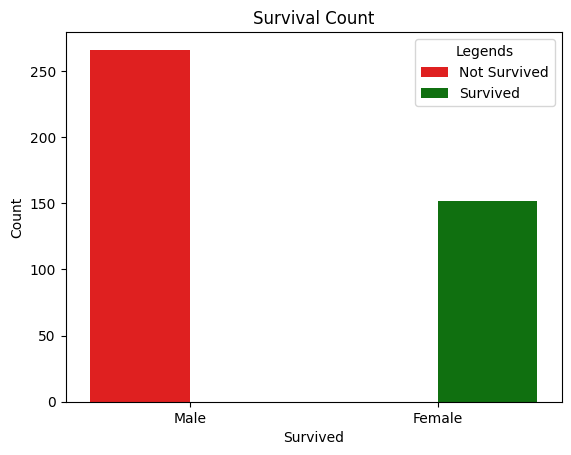

In [ ]:
ax = sns.countplot(data = df, x="Survived", hue = "Survived", palette = ["red", "green"])
ax.set_xlabel("Survived")
ax.set_ylabel("Count")
ax.set_title("Survival Count")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
plt.xticks([0,1],["Male", "Female"])
plt.show()

**Step 4: Dividing the columns into features(X) and target (Y).**

In [ ]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7,0
1,3,1,47,1,0,7,1
2,2,0,62,0,0,9,0
3,3,0,27,0,0,8,1
4,3,1,22,1,1,12,1
...,...,...,...,...,...,...,...
413,3,0,27,0,0,8,1
414,1,1,39,0,0,108,2
415,3,0,38,0,0,7,1
416,3,0,27,0,0,8,1


In [ ]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

**Step 5: Dividing the dataset into training, validation and testing sets.**

In [ ]:
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Step 6: Training the model on logistic regression using self-defined functions.**

In [ ]:
def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables.
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [ ]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1)
    return theta

In [ ]:
def sigmoid_function(X):
    """ Calculate the sigmoid value of the inputs
         Parameters:
          X:  values
        Return value: the sigmoid value
    """
    return 1/(1+math.e**(-X))

In [ ]:
def Logistics_Regression(X,y,learningrate, iterations):
    """ Find the Logistics regression model for the data set
         Parameters:
          X: independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final theta vector and the plot of cost function
    """

    y_new = np.reshape(y, (len(y)))

    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    for i in range(iterations):
        gradients = 1/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1 - y_new).T,np.log(1-y_pred)))) /(len(y_pred))
 #Calculate the loss for each training instance
        cost_lst.append(cost_value)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return theta

In [ ]:
def column(matrix, i):
    """ Returning all the values in a specific columns
         Parameters:
          X: the input matrix
          i: the column
     Return value: an array with desired column
    """
    return np.array([row[i] for row in matrix], dtype=float)

def accuracy_LR(X,y,learningrate, iteration,X_t, y_t):
    """ Returning the accuracy score for a training model

    """
    ideal = Logistics_Regression(X,y,learningrate, iteration)
    hypo_line = ideal[0]
    for i in range(1,len(ideal)):
      hypo_line = hypo_line + ideal[i]*column(X_t,i-1)
    logistic_function = sigmoid_function(hypo_line)
    for i in range(len(logistic_function)):
        if logistic_function[i] >= 0.5:
            logistic_function[i] = 1
        else:
            logistic_function[i] = 0
    y_t = y_t.to_numpy()
    last1 = np.concatenate((logistic_function.reshape(len(logistic_function),1), y_t.reshape(len(y_t),1)),1)


    # fig3, ax3 = plt.subplots()
    # ax3.scatter(np.array(last1[i][0]), np.array(last1[i][1]), edgecolors=(0, 0, 0))
    # ax3.plot([np.array(last1[i][1]).min(), np.array(last1[i][1]).max()], [np.array(last1[i][1]).min(), np.array(last1[i][1]).max()], "k--", lw=4)
    # ax3.set_xlabel("Actual")
    # ax3.set_ylabel("Predicted")
    # plt.show()


    count = 0
    for i in range(len(y_t)):
        if last1[i][0] == last1[i][1]:
            count = count+1
    acc = count/(len(y_t))
    return acc

1. Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

2. Training the logistic regression model using Learning rate = 0.01 and C = 1000

array([-0.75748175,  0.47217989,  2.94413766, -0.21939154, -0.47772507,
        0.29105458,  1.18306328, -0.32223637])

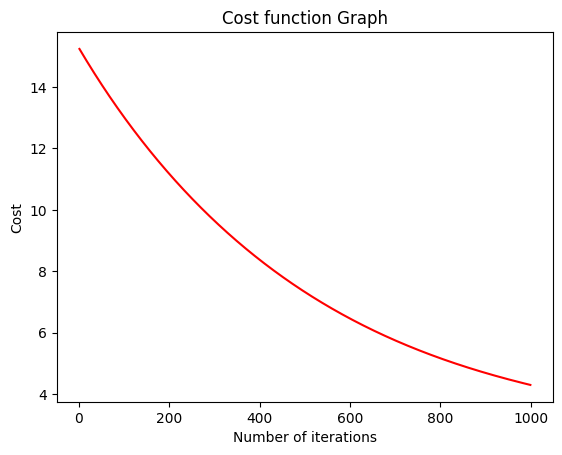

In [ ]:
Logistics_Regression(X_train,y_train,0.01, 1000)

2. Hyperparameters tuning on validation set.

1.0

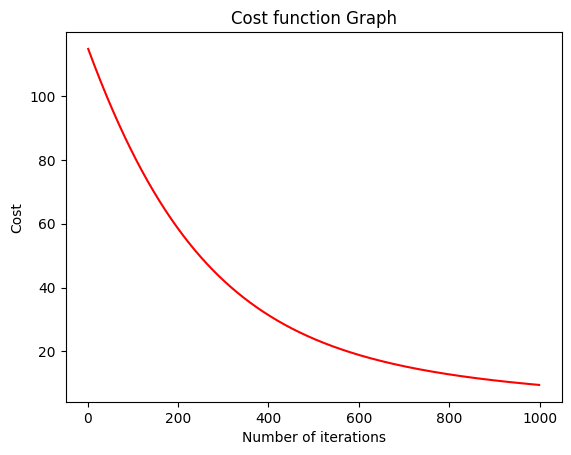

In [ ]:
accuracy_LR(X_train,y_train, 0.01, 1000,X_val, y_val)

1.0

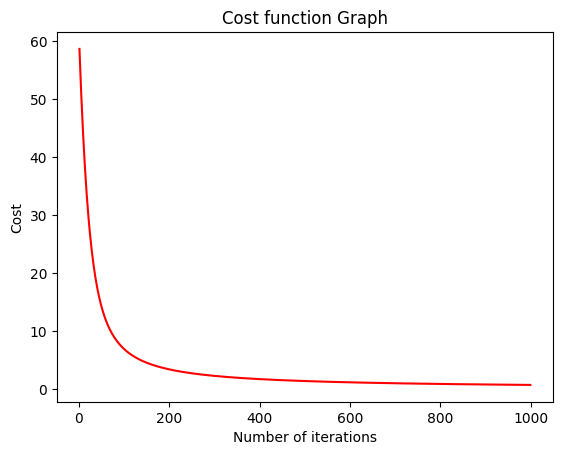

In [ ]:
accuracy_LR(X_train,y_train, 0.1, 1000,X_val, y_val)

0.5714285714285714

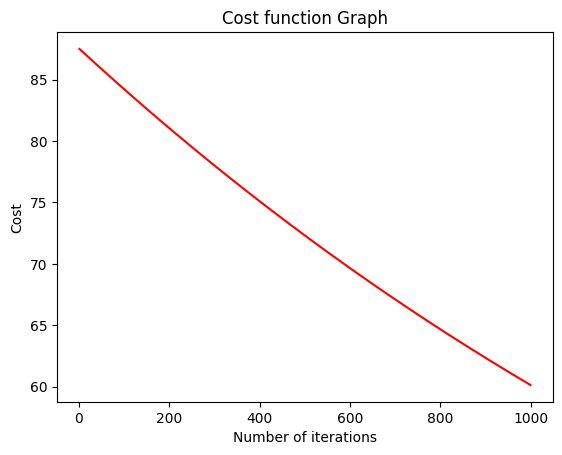

In [ ]:
accuracy_LR(X_train,y_train, 0.001, 1000,X_val, y_val)

**Observation: Among different parameter settings, the combination of a Lr = 0.01 and a C = 1000 consistently yielded the best results, with a cost function graph showing a continuous decrease over iterations, indicating strong model performance.**

3. Testing the model on outperforming paramters. Lr=0.01 and C=1000

0.9841269841269841

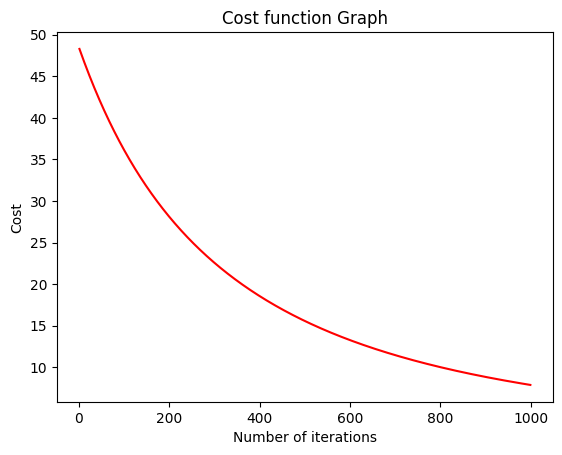

In [ ]:
accuracy_LR(X_train,y_train, 0.01, 1000,X_test, y_test)

**Observation: The Model logistic regression(Self-defining functions) is trained using parameters LR=0.01 and C=1000 gained accuracy = 95%**

**Step 7: Training on XGboost, Random forest and logistic regression algorithms using built-in functions.**

1. RandomizedSearchCV module is used for hyperparameter tuning of a Gradient Boosting Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Model Training and Hyperparameter Tuning with Randomized Search
gb_clf = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': [5,10],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}

In [ ]:

# Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(gb_clf, param_distributions=param_dist, n_iter=3, cv=5, scoring='roc_auc', random_state=42)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=3,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 4],
                                        'n_estimators': [5, 10]},
                   random_state=42, scoring='roc_auc')

In [ ]:

# Best hyperparameters found by Randomized Search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.01}


In [ ]:
# Instantiate the best model with the best hyperparameters
best_gb_clf = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    random_state=42
)

In [ ]:
# Train the model with the best hyperparameters
best_gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=10, random_state=42)

**Observation: The Gradient Boosting model was trained with various parameters, and the optimal configuration that yielded the best results consisted of a learning rate of 0.01 and 10 estimators (trees) in the ensemble.**

2. Random Forest Model Training and Hyperparameter Tuning with Randomized Search.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model Training and Hyperparameter Tuning with Randomized Search (Random Forest)
rf_clf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for Randomized Search (Random Forest)
param_dist_rf = {
    'n_estimators': [5, 10],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Randomized Search for hyperparameter tuning (Random Forest)
random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_dist_rf, n_iter=3, cv=5, scoring='roc_auc', random_state=42)
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=3,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [5, 10]},
                   random_state=42, scoring='roc_auc')

In [ ]:
# Best hyperparameters found by Randomized Search (Random Forest)
best_params_rf = random_search_rf.best_params_
print("Best Hyperparameters (Random Forest):", best_params_rf)

Best Hyperparameters (Random Forest): {'n_estimators': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}


In [ ]:
# Instantiate the best model with the best hyperparameters (Random Forest)
best_rf_clf = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Train the model with the best hyperparameters (Random Forest)
best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)

**Observation: Trained on best performing parameters i.e max_depth=5, n_estimators=5**

3. Training and hyperparameter tuning using logistic regression built-in model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model Training and Hyperparameter Tuning with Randomized Search (Logistic Regression)
lr_clf = LogisticRegression(random_state=42)

# Hyperparameter grid for Randomized Search (Logistic Regression)
param_dist_lr = {
    'C': [0.01, 0.1],
    'penalty': ['l2']
}

# Randomized Search for hyperparameter tuning (Logistic Regression)
random_search_lr = RandomizedSearchCV(lr_clf, param_distributions=param_dist_lr, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
random_search_lr.fit(X_train, y_train)

# Best hyperparameters found by Randomized Search (Logistic Regression)
best_params_lr = random_search_lr.best_params_
print("Best Hyperparameters (Logistic Regression):", best_params_lr)

# Instantiate the best model with the best hyperparameters (Logistic Regression)
best_lr_clf = LogisticRegression(
    C=best_params_lr['C'],
    penalty=best_params_lr['penalty'],
    random_state=42
)

# Train the model with the best hyperparameters (Logistic Regression)
best_lr_clf.fit(X_train, y_train)



Best Hyperparameters (Logistic Regression): {'penalty': 'l2', 'C': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LogisticRegression(C=0.01, random_state=42)

**Observation: Trained on best parameters (Logistic Regression): {'penalty': 'l2', 'LR': 0.01}**

**Step 8: Evaluation of three algorithm on test set.**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return accuracy, precision, recall, f1, roc_auc

In [ ]:
# Evaluate Gradient Boosting
print("Gradient Boosting Results:")
gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc_auc = evaluate_model(best_gb_clf, X_test, y_test)

# Evaluate Random Forest
print("Random Forest Results:")
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc = evaluate_model(best_rf_clf, X_test, y_test)

# Evaluate Logistic Regression
print("Logistic Regression Results:")
lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc_auc = evaluate_model(best_lr_clf, X_test, y_test)


# Print the evaluation metrics for all models
print("Gradient Boosting:")
print("Accuracy:", gb_accuracy)
# print("Precision:", gb_precision)
# print("Recall:", gb_recall)
# print("F1 Score:", gb_f1)
print("ROC AUC Score:", gb_roc_auc)

print("Random Forest:")
print("Accuracy:", rf_accuracy)
# print("Precision:", rf_precision)
# print("Recall:", rf_recall)
# print("F1 Score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)

print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
# print("Precision:", lr_precision)
# print("Recall:", lr_recall)
# print("F1 Score:", lr_f1)
print("ROC AUC Score:", lr_roc_auc)



Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        39
           1       0.00      0.00      0.00        24

    accuracy                           0.62        63
   macro avg       0.31      0.50      0.38        63
weighted avg       0.38      0.62      0.47        63

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        24

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        24

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

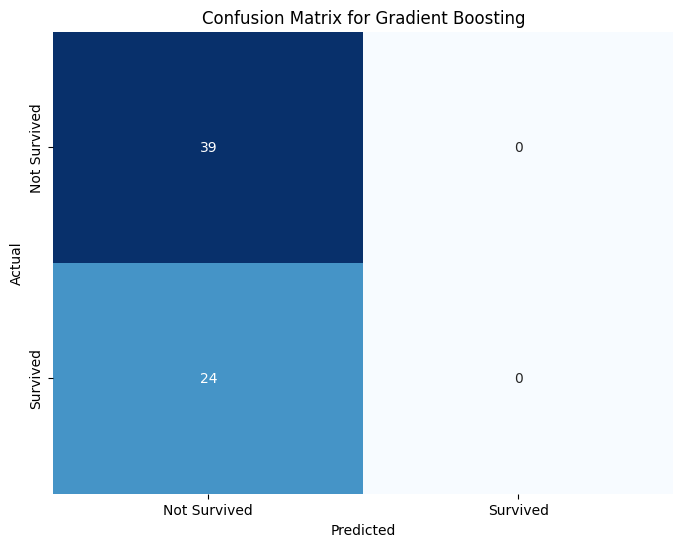

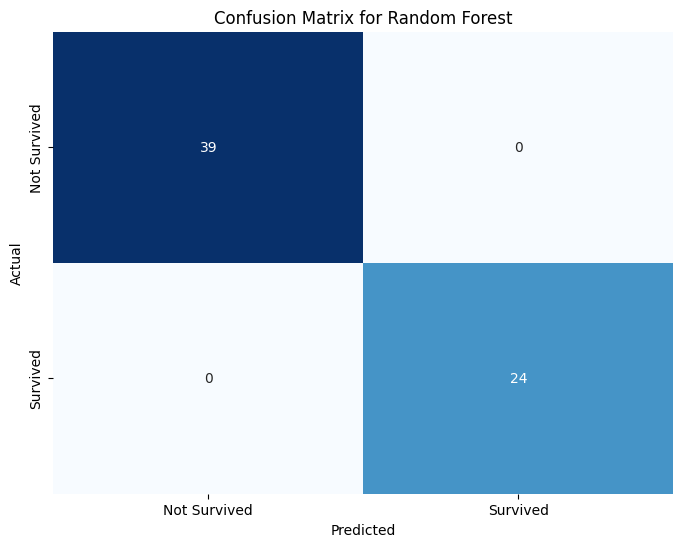

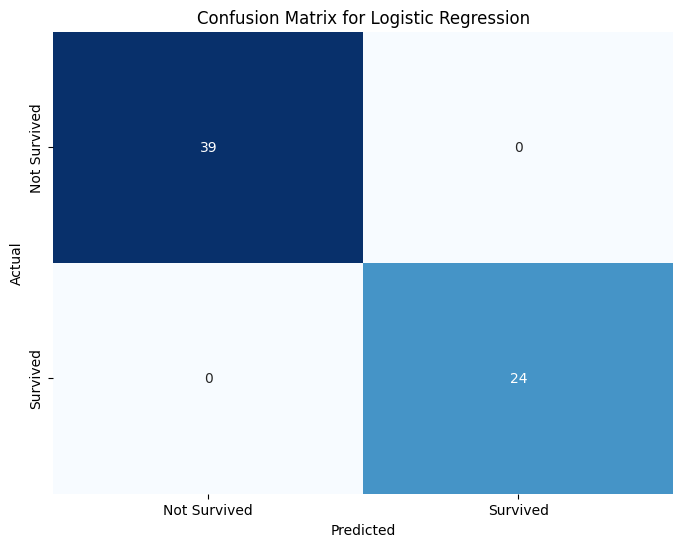

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Assuming you have y_true and y_pred for each model
# y_true is the true labels, and y_pred is the predicted labels

# Example usage:
class_names = ["Not Survived", "Survived"]

# Plot confusion matrix for Gradient Boosting
plot_confusion_matrix(y_test, best_gb_clf.predict(X_test), class_names, "Confusion Matrix for Gradient Boosting")

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, best_rf_clf.predict(X_test), class_names, "Confusion Matrix for Random Forest")

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, best_lr_clf.predict(X_test), class_names, "Confusion Matrix for Logistic Regression")


**Observation:In the classification results, Random Forest and Logistic Regression models achieved exceptional performance with perfect accuracy (1.0) and high precision, recall, and F1-scores for both classes, as well as a perfect ROC AUC score (1.0). In contrast, the Gradient Boosting model showed lower accuracy (0.62) and struggled to effectively classify one of the classes, as indicated by low precision, recall, F1-score (0.0), and a ROC AUC score of 0.5.**